# Analytical Solutions
### Task 1

Full assignment: https://gist.github.com/RafalKucharskiPK/c3bc960f047829569808ccbcffc3b8ce

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Introduction

## Problem Description

We explore a transportation system containing two routes (a and b) connecting an origin (O) to a destination (D). A set of Q individual travelers must make a decision on which route to take, based on the travel time and their preferences.

![image](https://user-images.githubusercontent.com/20555451/238653204-e8af9e52-262b-493b-a931-5cb3695bebd2.png)

The travel time on each arc (a or b) is represented by a non-linearly increasing BPR formula:

$t_a(q_a) = t^0_a \left (1 + \left (\frac{q_a}{Q_a} \right)^2 \right )$

where:
* $t_a(q_a)$ - is the travel time on arc a (or b)
* $q_a$ - is the flow (number of vehicles using arc)
* $t^0_a$ - is the free flow speed (with no other vehicles)
* $Q_a$ - is the capacity (maximal number of vehices)

In [2]:
travel_time = lambda q_x, t0_x, Q_x: (t0_x * (1 + ((q_x / Q_x) ** 2)))

Following the parameterization:

* $Q$ = 1000 veh/h
* $t^0_a$ = 5 min
* $t^0_b$ = 15 min
* $Q_a$ = 500 veh/h
* $Q_b$ = 800 veh/h

In [3]:
Q = 1000
t0_a = 5 / 60
t0_b = 15 / 60
Q_a = 500
Q_b = 800

## Objectives

The main objectives of this notebook are the analytic computations of:

1. **System Optimum (SO)**: To find the optimal distribution of travelers between routes a and b that minimizes the total cost (travel time) across all individuals. We seek to minimize:

   $t_a(q_a) \cdot q_a + t_b(q_b) \cdot q_b$, s.t. $q_a + q_b = Q$ , $q_a, q_b \geq 0$

In [4]:
def total_cost(q_a, t0_a, Q_a, q_b, t0_b, Q_b, Q):
    if (q_a + q_b != Q):
        raise ValueError("Invalid configuration: Number of vehicles does not match Q.")
    elif (q_a < 0) or (q_b < 0):
        raise ValueError("Invalid configuration: Numbers of vehicles cannot be negative.")
    else:
        return (travel_time(q_a, t0_a, Q_a) * q_a) + (travel_time(q_b, t0_b, Q_b) * q_b)

2. **User Equilibrium (UE)**: To find the state where every traveler is individually satisfied with their choice, meaning that the travel time on both routes is equal:

   $t_a(q_a) = t_b(q_b)$

# Exploratory Analysis

In [5]:
q_range = range(Q+1)

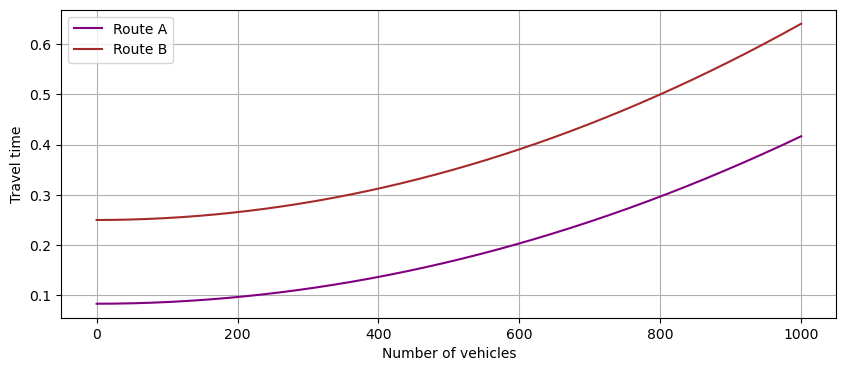

In [6]:
plt.figure(figsize=(10,4))

plt.plot(q_range, [travel_time(q_x, t0_a, Q_a) for q_x in q_range], label = "Route A", color="purple")
plt.plot(q_range, [travel_time(q_x, t0_b, Q_b) for q_x in q_range], label = "Route B", color="brown")

plt.legend()
plt.grid(True)
plt.xlabel("Number of vehicles")
plt.ylabel("Travel time")
plt.show()

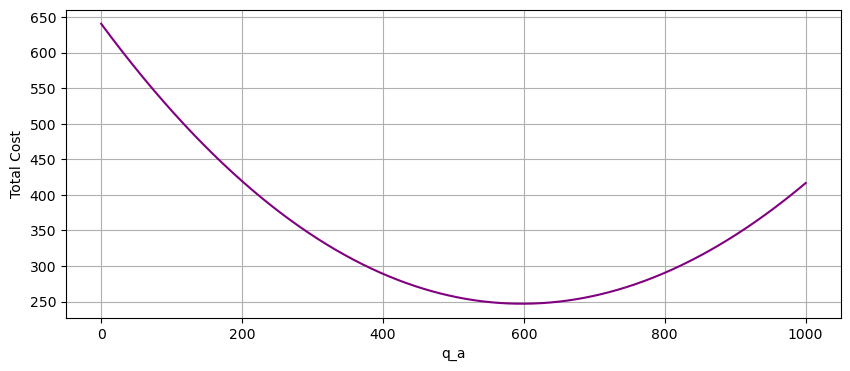

In [7]:
plt.figure(figsize=(10,4))

plt.plot(q_range, [total_cost(q_a, t0_a, Q_a, (Q - q_a), t0_b, Q_b, Q) for q_a in q_range], color="purple")

plt.xlabel('q_a')
plt.ylabel('Total Cost')

plt.grid(True)
plt.show()

In [8]:
min_cost = float('inf')
min_cost_qa = None

for q_a in q_range:
    cost = total_cost(q_a, t0_a, Q_a, (Q - q_a), t0_b, Q_b, Q)
    if cost < min_cost:
        min_cost = cost
        min_cost_qa = q_a
        
print("System Optimum:\nq_a: %d\nq_b: %d\nCost: %.3f" % (min_cost_qa, Q-min_cost_qa, min_cost))

System Optimum:
q_a: 597
q_b: 403
Cost: 246.992


# System Optimum (SO)

## Analytic Solution

$TotalCost = t_a(q_a) \cdot  q_a + t_b(q_b) \cdot  q_b
\newline
\text{Given $q_b=Q-q_a$,}
\newline
TotalCost = t_a(q_a) \cdot  q_a + t_b(Q - q_a) \cdot  (Q - q_a)
\newline
\text{Given parameterization,}
\newline
TotalCost = \dfrac{5}{60} \cdot  \left(1 + \left (\dfrac{q_a}{500} \right)^2 \right) \cdot  q_a + \dfrac{15}{60} \cdot  \left (1 + \left (\dfrac{(1000 - q_a)}{800}\right)^2 \right) \cdot  (1000 - q_a)
\newline$

##### Simplifying Total Cost
$\frac{1}{12} \cdot (1+\frac{q_a^2}{25 \cdot 10^4}) \cdot q_a+(\frac{1}{4} \cdot 1+\frac{(10^3-q_a)^2}{64 \cdot 10^4}) \cdot (10^3-q_a) =
\newline
(\frac{q_a}{12}+\frac{q_a^3}{3 \cdot 10^6})+(\frac{10^3-q_a}{4} \cdot (1+\frac{(10^3-q_a)^2}{64 \cdot 10^4}))=
\newline
\frac{q_a}{12}-\frac{q_a}{4}+\frac{q_a^3}{3 \cdot 10^6}+\frac{(10^3-q_a)^3}{256 \cdot 10^4}+\frac{10^3}{4}$

##### Derivative
$\frac{1}{12}-\frac{1}{4}+\frac{q_a^2}{10^6}-\frac{3 \cdot (10^3-q_a)^2}{256 \cdot 10^4}=
\newline
\frac{-1}{6}+\frac{q_a^2}{10^6}+\frac{(-3 \cdot 10^6)+(6 \cdot 10^3 \cdot q_a)-(3 \cdot q_a)}{256 \cdot 10^4}=
\newline
\frac{-1}{6}+\frac{q_a^2}{10^6}-\frac{300}{256}+\frac{6 \cdot q_a}{2560}-\frac{3 \cdot q_a^2}{256 \cdot 10^4}
\newline
\text{Simplifies to:}
\newline
-\dfrac{33 \cdot q_a^2-450000 \cdot q_a+257000000}{192000000}$

### Total Cost is minimized where $\frac{\partial \textit{Total Cost}}{\partial q_a}= 0$

$-33q_a^2+45 \cdot 10^4 \cdot q_a-257 \cdot 10^6=0
\newline
\Delta = (45 \cdot 10^4)^2-4 \cdot (-33) \cdot (-257 \cdot 10^6)
\newline
\Delta = 168576000000
\newline
\text{Delta is greater than zero.}
\newline
\sqrt{\Delta} = 410580.077
\newline
q_{a1} = \frac{-(45 \cdot 10^4)-\sqrt{\Delta}}{2 \cdot (-33)} \text{  and  } q_{a2} = \frac{-(45 \cdot 10^4)+\sqrt{\Delta}}{2 \cdot (-33)}
\newline
q_{a1} \approx 13039.09 \text{  and  } q_{a2} \approx  597.27
\newline
\text{Given $q_a \le Q$, $q_a \ge 0$ and $q_a \epsilon \mathbb{N}$}
\newline$
### $q_a \approx  597$ and $q_b \approx  403$

## Numerical Solution with Newton Raphson

In [9]:
first_order = lambda q_a: -(33*(q_a**2)-450000*q_a+257000000)/192000000

In [10]:
second_order = lambda q_a: -(((66*q_a)-450000)/192000000)

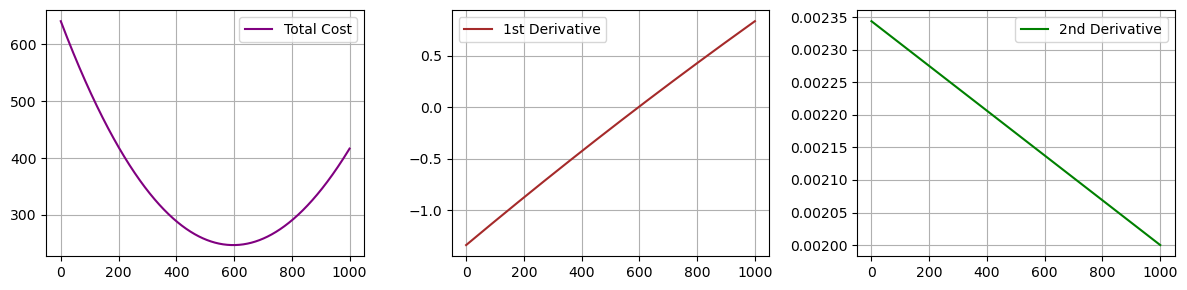

In [11]:
fig, axs = plt.subplots(1, 3, figsize=(12,3))

axs[0].plot(q_range, [total_cost(q_a, t0_a, Q_a, (Q - q_a), t0_b, Q_b, Q) for q_a in q_range], label="Total Cost", color="purple")
axs[0].legend()
axs[0].grid(True)

axs[1].plot(q_range, [first_order(q_a) for q_a in q_range], label="1st Derivative", color="brown")
axs[1].legend()
axs[1].grid(True)

axs[2].plot(q_range, [second_order(q_a) for q_a in q_range], label="2nd Derivative", color="green")
axs[2].legend()
axs[2].grid(True)

fig.tight_layout()

In [12]:
def newton_raphson(q_range, tol, max_iteration):
    
    q_a = random.choice(q_range)
    steps = [q_a]
    
    iteration = 0
    while iteration < max_iteration:
        q_a_new = q_a - first_order(q_a) / second_order(q_a)
        steps.append(q_a_new)
        if abs(q_a_new - q_a) < tol:
            break
        q_a = q_a_new
        iteration += 1
    return round(q_a), steps

In [13]:
q_a, steps = newton_raphson(q_range, 1e-6, 1000)
print("Found solution: %d in %d steps." % (q_a, len(steps)-1))

Found solution: 597 in 3 steps.


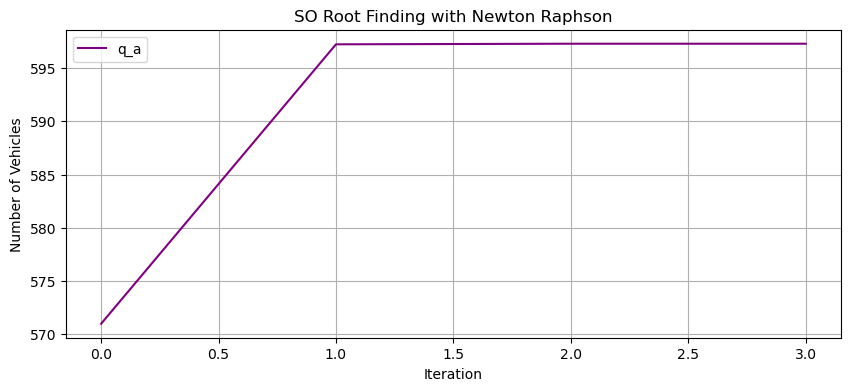

In [14]:
plt.figure(figsize=(10,4))

plt.plot(range(len(steps)), steps, label="q_a", color="purple")
#plt.plot(range(len(steps)), [Q-x for x in steps], label="q_b", color="brown")

plt.title("SO Root Finding with Newton Raphson")
plt.xlabel("Iteration")
plt.ylabel("Number of Vehicles")

plt.legend()
plt.grid(True)
plt.show()

# User Equilibrium

## Analytic Solution

$t_a(q_a)=t_b(q_b)
\newline
t_a^0(1+(\frac{q_a}{Q_a})^2) = t_b^0(1+(\frac{q_b}{Q_b})^2)
\newline
t_a^0(1+(\frac{q_a}{Q_a})^2) = t_b^0(1+(\frac{Q-q_a}{Q_b})^2)
\newline
\frac{5}{60}(1+(\frac{q_a}{500})^2) = \frac{15}{60}(1+(\frac{1000 - q_a}{800})^2)
\newline
\frac{q_a^2}{25 \cdot 10^4} = 2 + \frac{3 \cdot (1000-q_a)^2}{64 \cdot 10^4}
\newline
\frac{q_a^2}{25} = \frac{(3 \cdot q_a^2) - (6 \cdot 10^3 \cdot q_a) + (128 \cdot 10^4+3 \cdot 10^6)}{64}
\newline$
#### $(\frac{11}{1600}) \cdot q_a^2+(\frac{-375}{4}) \cdot q_a+66875 = 0$

In [15]:
UE_formulation = lambda x: (11/1600)*pow(x,2)+(-375/4)*x+66875

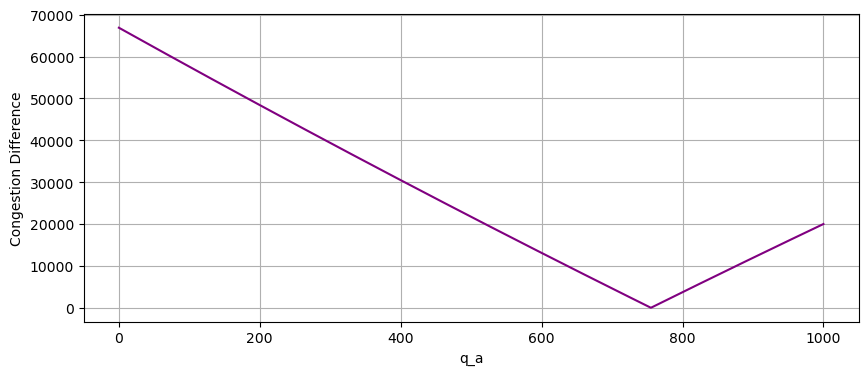

In [16]:
plt.figure(figsize=(10,4))

plt.plot(q_range, [abs(UE_formulation(x)) for x in q_range], color="purple")

plt.xlabel("q_a")
plt.ylabel("Congestion Difference")

plt.grid(True)

### Solution
$\Delta=(\frac{-375}{4})^2-4 \cdot \frac{11}{1600} \cdot 66875 = 6950
\newline
\sqrt{\Delta} \approx  83.36666
\newline
q_{a1}=\frac{-\frac{375}{4}-\sqrt{\Delta}}{2 \cdot \frac{11}{1600}} \approx  755.15
\newline
q_{a2}=\frac{-\frac{375}{4}+\sqrt{\Delta}}{2 \cdot \frac{11}{1600}} \approx  12881.21
\newline
\text{Given $q_a \le Q$, $q_a \ge 0$ and $q_a \epsilon \mathbb{N}$}
\newline$
###  $q_a \approx  755$ and $q_b \approx  245$

#### Checking the solution

In [17]:
min_diff = float('inf')
min_q = None

for q_a in q_range:
    ue = UE_formulation(q_a)
    if abs(ue) <= min_diff:
        min_diff = abs(ue)
        min_q = q_a
        
print("Best solution found: q_a: %d, q_b: %d, with cost: %.4f" % (min_q, Q-min_q, min_diff))

Best solution found: q_a: 755, q_b: 245, with cost: 12.6719


## Numerical Solution with SAM

In [18]:
def successive_averages_method(q_range, Q, max_iter, alpha, epsilon):
    
    # Initialization
    q_a = random.choice(q_range)
    q_b = Q - q_a

    steps = list()
    
    for i in range(max_iter):

        steps.append(q_a)

        # Travel times
        t_a = travel_time(q_a, t0_a, Q_a)
        t_b = travel_time(q_b, t0_b, Q_b)
        # New flows
        q_a_new = alpha * q_a + (1 - alpha) * ((t_a < t_b) * Q)
        q_b_new = Q - q_a_new

        # Check convergence
        if (abs(q_a_new - q_a) < epsilon):
            break

        q_a, q_b = q_a_new, q_b_new
        alpha += 5e-5

    return q_a, steps

In [19]:
q_a, steps = successive_averages_method(q_range, Q, 100000, 0.8, 1e-6)

print("User Equilibrium\n q_a: %d, q_b: %d" % (round(q_a), Q-round(q_a)))
print("Travel times\n Route A: %.4f, Route B: %.4f" % (travel_time(round(q_a), t0_a, Q_a), travel_time(Q-round(q_a), t0_b, Q_b)))

User Equilibrium
 q_a: 755, q_b: 245
Travel times
 Route A: 0.2733, Route B: 0.2734


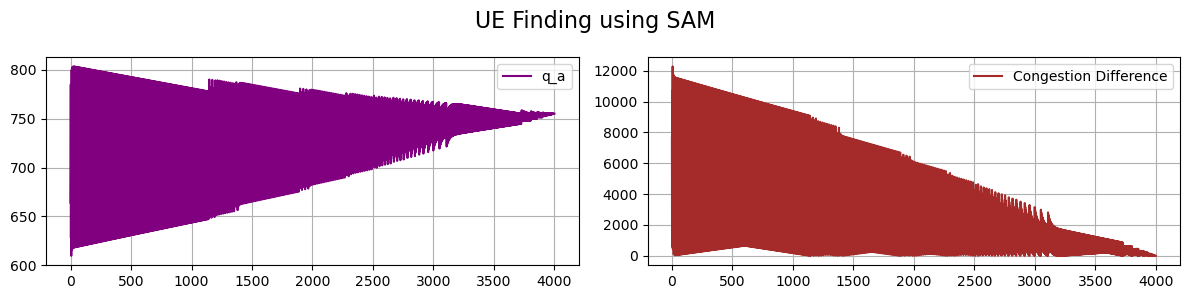

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,3))

ax1.plot(steps, color="purple", label="q_a")
ax1.grid(True)
ax1.legend()

ax2.plot([abs(UE_formulation(r)) for r in steps], color="brown", label="Congestion Difference")
ax2.grid(True)
ax2.legend()

fig.suptitle('UE Finding using SAM', fontsize=16)
fig.tight_layout()